<a href="https://colab.research.google.com/github/siddharth101/Double_suspension/blob/main/single_block_multi_rotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
from sympy import zeros, symbols
from sympy import eye, Matrix
import sympy.physics.mechanics as me
from sympy import expand
from sympy.parsing.sympy_parser import parse_expr
from sympy.physics.mechanics import Body, PinJoint, PrismaticJoint, JointsMethod, inertia
from sympy.physics.mechanics import dynamicsymbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, outer
from sympy.physics.mechanics import ReferenceFrame, Point, RigidBody
from sympy.physics.mechanics import kinetic_energy, potential_energy, Point, Particle

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

smp.init_printing(use_latex='mathjax')

In [ ]:
def pos_vectors(point1, point2, frame):

    pos_vec = point1.pos_from(point2).express(frame)

    return pos_vec

In [279]:
T1, T2, T3, T4 = symbols('T1 T2 T3 T4')


M1, d, d1, d2, w1, w2, n1, ixx1, iyy1, izz1, ixy1, iyz1, ixz1, g, k, t = symbols('M1 d d1 d2 w1 w2 n1 ixx1 iyy1 izz1 ixy1 iyz1 ixz1 g k t')

q1, q2, q3, q4, q5, q6, q7 = dynamicsymbols('q1 q2 q3 q4 q5 q6 q7')
u1, u2, u3, u4, u5, u6, u7 = dynamicsymbols('u1 u2 u3 u4 u5 u6 u7')

x_x0, x_y0, x_z0, x_x1, x_y1, x_z1, x_x2, x_y2, x_z2 = dynamicsymbols('x_x0, x_y0, x_z0, x_x1, x_y1, x_z1, x_x2, x_y2, x_z2')


psi, gamma, theta = dynamicsymbols('psi gamma theta')

alpha_x1, alpha_x2,  = dynamicsymbols('alpha_x1, alpha_x2')
beta_x1, beta_x2 = dynamicsymbols('beta_x1 beta_x2')
#beta_x1, beta_x2 = symbols('beta_x1 beta_x2')

alpha_y1, alpha_y2 = dynamicsymbols('alpha_y1, alpha_y2')
beta_y1, beta_y2 = dynamicsymbols('beta_y1 beta_y2')
#beta_y1, beta_y2 = symbols('beta_y1 beta_y2')

#alpha_z1, alpha_z2 = dynamicsymbols('alpha_z1 alpha_z2')
alpha_z1, alpha_z2 = symbols('alpha_z1 alpha_z2')
#beta_z1, beta_z2  = dynamicsymbols('beta_z1 beta_z2')
beta_z1, beta_z2  = symbols('beta_z1 beta_z2')

#omega_x1, omega_x2,  omega_y1, omega_y2, omega_z1, omega_z2 = symbols('omega_x1, omega_x2, omega_y1, omega_y2, omega_z1, omega_z2')
omega_x1, omega_x2 = dynamicsymbols('omega_x1, omega_x2')
omega_y1, omega_y2 = dynamicsymbols('omega_y1, omega_y2')
#omega_z1, omega_z2 = dynamicsymbols('omega_z1, omega_z2')

omega_z1, omega_z2 = symbols('omega_z1 omega_z2')


In [331]:
N = ReferenceFrame('N') # this is the global frame
N_a = ReferenceFrame('N_a') # this is the  frame of suspension point
A = ReferenceFrame('A') # this is the frame of the body
B = ReferenceFrame('B') # this is the frame of the body

A.orient_axis(N, 0, N.z) # Initially A and N are parallel
B.orient_axis(N, 0, N.z) # Initially B and N are parallel
N_a.orient_axis(N, 0, N.z) # Initially N and N_a are parallel

In [332]:
O = Point('O')
P = Point('P')
P1 = Point('P1')
P2 = Point('P2')
P3 = Point('P3')
P4 = Point('P4')
X1 = Point('X1')
B1 = Point('B1')
B2 = Point('B2')
B3 = Point('B3')
B4 = Point('B4')


X1a = Point('X1a')
B1a = Point('B1a')
B2a = Point('B2a')
B3a = Point('B3a')
B4a = Point('B4a')


In [333]:
P.set_pos(O, q1*N.x + q2*N.y )#+ q3*N.z)
X1.set_pos(O,  q1*N.x + q2*N.y -q4*N.z) # COM

### Bs are attachment point on the block
B1.set_pos(X1, w1*A.x +  d1*A.z - n1*A.y)
B2.set_pos(X1, w1*A.x +  d1*A.z + n1*A.y)
B3.set_pos(X1, -w1*A.x + d1*A.z - n1*A.y)
B4.set_pos(X1, -w1*A.x + d1*A.z + n1*A.y)

### Ps are points on the cieling
P1.set_pos(P, w1*N_a.x - n1*N_a.y) #+ d*N_a.z)
P2.set_pos(P, w1*N_a.x + n1*N_a.y) #+ d*N_a.z)
P3.set_pos(P, -w1*N_a.x - n1*N_a.y) # + d*N_a.z)
P4.set_pos(P, -w1*N_a.x + n1*N_a.y) # + d*N_a.z)

In [334]:
### Lets now translate the body 1 longitudinal, transverse and vertical
#X1a.set_pos(O, - (q4 + x_z1)*N.z + (q2 + x_y1)*N.y +(q1 + x_x1)*N.x)
X1a.set_pos(O, (q1 + (x_x1 - x_x0))*N.x + q2*N.y - q4*N.z) # Moving COM by x_x1 - x_x0

B1a.set_pos(X1a, w1*A.x +  d1*A.z - n1*A.y)
B2a.set_pos(X1a, w1*A.x +  d1*A.z + n1*A.y)
B3a.set_pos(X1a, -w1*A.x + d1*A.z - n1*A.y)
B4a.set_pos(X1a, -w1*A.x + d1*A.z + n1*A.y)

In [335]:
pos_vectors(B1a, P1, N)

(-xₓ₀(t) + xₓ₁(t)) n_x + (d₁ - q₄(t)) n_z

In [336]:
#A.orient_body_fixed(N, (-(alpha_x1 - beta_x1), -(alpha_y1 - beta_y1), 0), 'xyz')
#A.orient_body_fixed(N, (psi, gamma, 0), 'xyz')
#A.orient_body_fixed(N, (0, gamma, 0), 'xyz')
A.orient_body_fixed(N, (0, (alpha_y1 - beta_y1), 0), 'xyz') # rotating along y axis by angle alpha_y1 - beta_y1

In [337]:
A.dcm(N)

⎡cos(α_y1(t) - β_y1(t))  0  -sin(α_y1(t) - β_y1(t))⎤
⎢                                                  ⎥
⎢          0             1             0           ⎥
⎢                                                  ⎥
⎣sin(α_y1(t) - β_y1(t))  0  cos(α_y1(t) - β_y1(t)) ⎦

In [338]:
### Position vectors of B1a and B2a wrt P1 in N frame
B1a_p1nf = B1a.pos_from(P1).express(N)
B2a_p2nf = B2a.pos_from(P2).express(N)

### Position vectors of B1a and B2a wrt P1 in A frame
B1a_p1af = B1a.pos_from(P1).express(A)
B2a_p2af = B2a.pos_from(P2).express(A)

In [339]:
### Tension in A frame is along the vectors B1a-P1 and B2a-P2
dirT1af = -B1a_p1af/B1a_p1af.magnitude()
dirT2af = -B2a_p2af/B2a_p2af.magnitude()

dirT1nf = -B1a_p1nf/B1a_p1nf.magnitude()
dirT2nf = -B2a_p2nf/B2a_p2nf.magnitude()

In [341]:

dirT1nf

                                     -d₁⋅sin(α_y1(t) - β_y1(t)) - w₁⋅cos(α_y1(
──────────────────────────────────────────────────────────────────────────────
   ___________________________________________________________________________
  ╱                                                                2
╲╱  (d₁⋅cos(α_y1(t) - β_y1(t)) - w₁⋅sin(α_y1(t) - β_y1(t)) - q₄(t))  + (d₁⋅sin

t) - β_y1(t)) + w₁ + xₓ₀(t) - xₓ₁(t)
───────────────────────────────────────────────────────────────────────── n_x
_________________________________________________________________________
                                                                       2
(α_y1(t) - β_y1(t)) + w₁⋅cos(α_y1(t) - β_y1(t)) - w₁ - xₓ₀(t) + xₓ₁(t))

                                               -d₁⋅cos(α_y1(t) - β_y1(t)) + w₁
+ ────────────────────────────────────────────────────────────────────────────
     _________________________________________________________________________
    ╱                                     

In [342]:
### Creating a body of Mass M in frame A with COM X1a
#IB = inertia(A, ixx1, iyy1, izz1, ixy1, ixz1, iyz1)
#IB = inertia(A, ixx1, iyy1, izz1)
IB = inertia(A, ixx1, iyy1, izz1, ixy=ixy1, iyz=iyz1, izx=ixz1)

block = Body('B', X1a, mass=M1, frame=A, central_inertia=IB)
#block.frame.set_ang_vel(N, omega_x1*N.x + omega_y1*N.y)
block.frame.set_ang_vel(N, omega_y1*N.y)

X1a.set_vel(N, u1*N.x + u2*N.y + u4*N.z)

In [343]:
delta_l1,delta_l2 =  smp.symbols('\delta_l1 \delta_l2')
### Defining the tensions
T1 = smp.Rational(1,2)*M1*g + k*delta_l1 #ext_1a_approx
T2 = smp.Rational(1,2)*M1*g - k*delta_l2 #ext_2a_approx

In [344]:
T1*dirT1nf.subs({psi:0, gamma:0})

                          ⎛M₁⋅g             ⎞
                          ⎜──── + \deltaₗ₁⋅k⎟⋅(-d₁⋅sin(α_y1(t) - β_y1(t)) - w₁
                          ⎝ 2               ⎠
──────────────────────────────────────────────────────────────────────────────
   ___________________________________________________________________________
  ╱                                                                2
╲╱  (d₁⋅cos(α_y1(t) - β_y1(t)) - w₁⋅sin(α_y1(t) - β_y1(t)) - q₄(t))  + (d₁⋅sin


⋅cos(α_y1(t) - β_y1(t)) + w₁ + xₓ₀(t) - xₓ₁(t))

───────────────────────────────────────────────────────────────────────── n_x
_________________________________________________________________________
                                                                       2
(α_y1(t) - β_y1(t)) + w₁⋅cos(α_y1(t) - β_y1(t)) - w₁ - xₓ₀(t) + xₓ₁(t))

                                    ⎛M₁⋅g             ⎞
                                    ⎜──── + \deltaₗ₁⋅k⎟⋅(-d₁⋅cos(α_y1(t) - β_y
                                    ⎝ 2

In [345]:

block.apply_force(T1*dirT1nf, point=B1a)
block.apply_force(T2*dirT2nf, point= B2a)

block.apply_force(-M1*g*N.z.express(A), point = X1a)

In [346]:
block.loads

[(B1a,
  (M1*g/2 + \delta_l1*k)*(-d1*sin(alpha_y1(t) - beta_y1(t)) - w1*cos(alpha_y1(t) - beta_y1(t)) + w1 + x_x0(t) - x_x1(t))/sqrt((d1*cos(alpha_y1(t) - beta_y1(t)) - w1*sin(alpha_y1(t) - beta_y1(t)) - q4(t))**2 + (d1*sin(alpha_y1(t) - beta_y1(t)) + w1*cos(alpha_y1(t) - beta_y1(t)) - w1 - x_x0(t) + x_x1(t))**2)*N.x + (M1*g/2 + \delta_l1*k)*(-d1*cos(alpha_y1(t) - beta_y1(t)) + w1*sin(alpha_y1(t) - beta_y1(t)) + q4(t))/sqrt((d1*cos(alpha_y1(t) - beta_y1(t)) - w1*sin(alpha_y1(t) - beta_y1(t)) - q4(t))**2 + (d1*sin(alpha_y1(t) - beta_y1(t)) + w1*cos(alpha_y1(t) - beta_y1(t)) - w1 - x_x0(t) + x_x1(t))**2)*N.z),
 (B2a,
  (M1*g/2 - \delta_l2*k)*(-d1*sin(alpha_y1(t) - beta_y1(t)) - w1*cos(alpha_y1(t) - beta_y1(t)) + w1 + x_x0(t) - x_x1(t))/sqrt((d1*cos(alpha_y1(t) - beta_y1(t)) - w1*sin(alpha_y1(t) - beta_y1(t)) - q4(t))**2 + (d1*sin(alpha_y1(t) - beta_y1(t)) + w1*cos(alpha_y1(t) - beta_y1(t)) - w1 - x_x0(t) + x_x1(t))**2)*N.x + (M1*g/2 - \delta_l2*k)*(-d1*cos(alpha_y1(t) - beta_y1(t)) + w1*

In [347]:
# kane = me.KanesMethod(N, q_ind=[psi, gamma, x_x1, x_y1, x_z1],

#                       u_ind = [omega_x1, omega_y1, u1, u2,  u4],

#                       kd_eqs=[omega_x1 - psi.diff(t),
#                               omega_y1 - gamma.diff(t), u1 - x_x1.diff(t), u2 - x_y1.diff(t), u4-x_z1.diff(t),
#                               ])

# kane = me.KanesMethod(N, q_ind=[alpha_x1, alpha_y1, x_x1, q2, q4],

#                       u_ind = [omega_x1, omega_y1, u1, u2,  u4],

#                       kd_eqs=[omega_x1 - alpha_x1.diff(t),
#                               omega_y1 - alpha_y1.diff(t), u1 - x_x1.diff(t), u2 - q2.diff(t), u4+q4.diff(t),
#                               ])

# kane = me.KanesMethod(N, q_ind=[psi, gamma, x_x1, q2, q4],

#                       u_ind = [omega_x1, omega_y1, u1, u2,  u4],

#                       kd_eqs=[omega_x1 - psi.diff(t),
#                               omega_y1 - gamma.diff(t), u1 - x_x1.diff(t), u2 - q2.diff(t), u4+q4.diff(t),
#                               ])

# kane = me.KanesMethod(N, q_ind=[gamma, x_x1, q4],

#                       u_ind = [omega_y1, u1, u4],

#                       kd_eqs=[
#                               omega_y1 - gamma.diff(t), u1 - x_x1.diff(t), u4 + q4.diff(t),
#                               ])


kane = me.KanesMethod(N, q_ind=[alpha_y1, x_x1, q4],

                      u_ind = [omega_y1, u1, u4],

                      kd_eqs=[
                              omega_y1 - alpha_y1.diff(t), u1 - x_x1.diff(t), u4 + q4.diff(t),
                              ])

kaneeq = kane.kanes_equations([block], block.loads)

In [348]:
kaneeq[1]

⎡      d          ⎤
⎢-iyy₁⋅──(ω_y1(t))⎥
⎢      dt         ⎥
⎢                 ⎥
⎢      d          ⎥
⎢  -M₁⋅──(u₁(t))  ⎥
⎢      dt         ⎥
⎢                 ⎥
⎢      d          ⎥
⎢  -M₁⋅──(u₄(t))  ⎥
⎣      dt         ⎦

In [426]:
#kaneeq[0][0]

In [427]:
kane.q

⎡α_y1(t)⎤
⎢       ⎥
⎢xₓ₁(t) ⎥
⎢       ⎥
⎣ q₄(t) ⎦

In [428]:
kane.u

⎡ω_y1(t)⎤
⎢       ⎥
⎢ u₁(t) ⎥
⎢       ⎥
⎣ u₄(t) ⎦

In [429]:
kane.mass_matrix

⎡iyy₁  0   0 ⎤
⎢            ⎥
⎢ 0    M₁  0 ⎥
⎢            ⎥
⎣ 0    0   M₁⎦

In [430]:
kane.mass_matrix[1,1]

M₁

In [431]:
kanel = kane.to_linearizer()

In [432]:
kane._k_d

⎡iyy₁  0   0 ⎤
⎢            ⎥
⎢ 0    M₁  0 ⎥
⎢            ⎥
⎣ 0    0   M₁⎦

In [433]:
kanel.r

⎡β_y1(t)⎤
⎢       ⎥
⎣xₓ₀(t) ⎦

In [435]:
A, B = kanel.linearize(A_and_B=True, op_point={alpha_y1:beta_y1, x_x1:x_x0})

In [436]:
A

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢ ⎛     ⎛     ⎛M₁⋅g             ⎞                 ⎛M₁⋅g             ⎞⎞      ⎛ 
⎢ ⎜     ⎜  d₁⋅⎜──── + \deltaₗ₁⋅k⎟   (-d₁ + q₄(t))⋅⎜──── + \deltaₗ₁⋅k⎟⎟      ⎜ 
⎢ ⎜     ⎜     ⎝ 2               ⎠                 ⎝ 2               ⎠⎟      ⎜ 
⎢-⎜- d₁⋅⎜- ────────────────────── - ─────────────────────────────────⎟ - d₁⋅⎜-
⎢ ⎜     ⎜       _______________                _______________       ⎟      ⎜ 
⎢ ⎜     ⎜      ╱             2                ╱             2        ⎟      ⎜ 
⎢ ⎝     ⎝    ╲╱  (d₁ - q₄(t))               ╲╱  (d₁ 

In [437]:
B

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢ ⎛     ⎛   ⎛M₁⋅g             ⎞                 ⎛M₁⋅g             ⎞⎞      ⎛   
⎢ ⎜     ⎜d₁⋅⎜──── + \deltaₗ₁⋅k⎟   (-d₁ + q₄(t))⋅⎜──── + \deltaₗ₁⋅k⎟⎟      ⎜d₁⋅
⎢ ⎜     ⎜   ⎝ 2               ⎠                 ⎝ 2               ⎠⎟      ⎜   
⎢-⎜- d₁⋅⎜────────────────────── + ─────────────────────────────────⎟ - d₁⋅⎜───
⎢ ⎜     ⎜     _______________                _______________       ⎟      ⎜   
⎢ ⎜     ⎜    ╱             2                ╱             2        ⎟      ⎜   
⎢ ⎝     ⎝  ╲╱  (d₁ - q₄(t))               ╲╱  (d₁ - 

In [439]:
B.subs({delta_l1:0, delta_l2:0})

⎡                                                              0              
⎢                                                                             
⎢                                                              0              
⎢                                                                             
⎢                                                              0              
⎢                                                                             
⎢ ⎛       ⎛      M₁⋅d₁⋅g           M₁⋅g⋅(-d₁ + q₄(t)) ⎞        ⎛  M₁⋅g⋅w₁⋅(-d₁
⎢-⎜- 2⋅d₁⋅⎜──────────────────── + ────────────────────⎟ + 2⋅w₁⋅⎜- ────────────
⎢ ⎜       ⎜     _______________        _______________⎟        ⎜              
⎢ ⎜       ⎜    ╱             2        ╱             2 ⎟        ⎜           ⎛  
⎢ ⎝       ⎝2⋅╲╱  (d₁ - q₄(t))     2⋅╲╱  (d₁ - q₄(t))  ⎠        ⎝         2⋅⎝(d
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                   

In [361]:
kane.q

⎡α_y1(t)⎤
⎢       ⎥
⎢xₓ₁(t) ⎥
⎢       ⎥
⎣ q₄(t) ⎦

### Checking A matrix

In [362]:
A

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢ ⎛     ⎛     ⎛M₁⋅g             ⎞                 ⎛M₁⋅g             ⎞⎞      ⎛ 
⎢ ⎜     ⎜  d₁⋅⎜──── + \deltaₗ₁⋅k⎟   (-d₁ + q₄(t))⋅⎜──── + \deltaₗ₁⋅k⎟⎟      ⎜ 
⎢ ⎜     ⎜     ⎝ 2               ⎠                 ⎝ 2               ⎠⎟      ⎜ 
⎢-⎜- d₁⋅⎜- ────────────────────── - ─────────────────────────────────⎟ - d₁⋅⎜-
⎢ ⎜     ⎜       _______________                _______________       ⎟      ⎜ 
⎢ ⎜     ⎜      ╱             2                ╱             2        ⎟      ⎜ 
⎢ ⎝     ⎝    ╲╱  (d₁ - q₄(t))               ╲╱  (d₁ 

In [363]:
list(zip(kane.q, [0,1,2]))

[(α_y1(t), 0), (xₓ₁(t), 1), (q₄(t), 2)]

In [ ]:
#kaneeq[0][0].diff(alpha_y1).subs({delta_l1:0, delta_l2:0, alpha_y1:beta_y1, x_x1:x_x0}).simplify()

In [ ]:
#A[3,0].subs({delta_l1:0, delta_l2:0}).simplify()

In [440]:
#kaneeq[0][0].diff(x_x1).subs({delta_l1:0, delta_l2:0, alpha_y1:beta_y1, x_x1:x_x0}).simplify()

In [ ]:
#A[3,1].subs({delta_l1:0, delta_l2:0}).simplify()

In [378]:
kane.q

⎡α_y1(t)⎤
⎢       ⎥
⎢xₓ₁(t) ⎥
⎢       ⎥
⎣ q₄(t) ⎦

In [364]:
[kaneeq[0][0].diff(i).subs({delta_l1:0, delta_l2:0, alpha_y1:beta_y1, x_x1:x_x0}).simplify() for i in kane.q]

⎡ -M₁⋅d₁⋅g⋅q₄(t)         -M₁⋅d₁⋅g         ⎤
⎢──────────────────, ──────────────────, 0⎥
⎢   _______________     _______________   ⎥
⎢  ╱             2     ╱             2    ⎥
⎣╲╱  (d₁ - q₄(t))    ╲╱  (d₁ - q₄(t))     ⎦

In [365]:
[A[3,i].subs({delta_l1:0, delta_l2:0}).simplify() for i in [0,1,2]]

⎡    -M₁⋅d₁⋅g⋅q₄(t)              -M₁⋅d₁⋅g           ⎤
⎢───────────────────────, ───────────────────────, 0⎥
⎢        _______________          _______________   ⎥
⎢       ╱             2          ╱             2    ⎥
⎣iyy₁⋅╲╱  (d₁ - q₄(t))    iyy₁⋅╲╱  (d₁ - q₄(t))     ⎦

In [366]:
[kaneeq[0][1].diff(i).subs({delta_l1:0, delta_l2:0, alpha_y1:beta_y1, x_x1:x_x0}).simplify() for i in kane.q]

⎡    -M₁⋅d₁⋅g              -M₁⋅g          ⎤
⎢──────────────────, ──────────────────, 0⎥
⎢   _______________     _______________   ⎥
⎢  ╱             2     ╱             2    ⎥
⎣╲╱  (d₁ - q₄(t))    ╲╱  (d₁ - q₄(t))     ⎦

In [367]:
[A[4,i].subs({delta_l1:0, delta_l2:0}).simplify() for i in [0,1,2]]

⎡      -d₁⋅g                -g            ⎤
⎢──────────────────, ──────────────────, 0⎥
⎢   _______________     _______________   ⎥
⎢  ╱             2     ╱             2    ⎥
⎣╲╱  (d₁ - q₄(t))    ╲╱  (d₁ - q₄(t))     ⎦

In [368]:
[kaneeq[0][2].diff(i).subs({delta_l1:0, delta_l2:0, alpha_y1:beta_y1, x_x1:x_x0}).simplify() for i in kane.q]

[0, 0, 0]

In [369]:
[A[5,i].subs({delta_l1:0, delta_l2:0}).simplify() for i in [0,1,2]]

[0, 0, 0]

In [370]:
kanel.r

⎡β_y1(t)⎤
⎢       ⎥
⎣xₓ₀(t) ⎦

### Checking B matrix

In [371]:
[kaneeq[0][i].diff(beta_y1).subs({delta_l1:0, delta_l2:0, alpha_y1:beta_y1, x_x1:x_x0}).simplify() for i in [0,1,2]]

⎡  M₁⋅d₁⋅g⋅q₄(t)          M₁⋅d₁⋅g         ⎤
⎢──────────────────, ──────────────────, 0⎥
⎢   _______________     _______________   ⎥
⎢  ╱             2     ╱             2    ⎥
⎣╲╱  (d₁ - q₄(t))    ╲╱  (d₁ - q₄(t))     ⎦

In [372]:
[B[i,0].subs({delta_l1:0, delta_l2:0}).simplify() for i in [3,4,5]]

⎡           M₁⋅d₁⋅g⋅q₄(t)                    d₁⋅g          ⎤
⎢───────────────────────────────────, ──────────────────, 0⎥
⎢        ___________________________     _______________   ⎥
⎢       ╱   2                  2        ╱             2    ⎥
⎣iyy₁⋅╲╱  d₁  - 2⋅d₁⋅q₄(t) + q₄ (t)   ╲╱  (d₁ - q₄(t))     ⎦

In [373]:
[kaneeq[0][i].diff(x_x0).subs({delta_l1:0, delta_l2:0, alpha_y1:beta_y1, x_x1:x_x0}).simplify() for i in [0,1,2]]

⎡     M₁⋅d₁⋅g               M₁⋅g          ⎤
⎢──────────────────, ──────────────────, 0⎥
⎢   _______________     _______________   ⎥
⎢  ╱             2     ╱             2    ⎥
⎣╲╱  (d₁ - q₄(t))    ╲╱  (d₁ - q₄(t))     ⎦

In [374]:
[B[i,1].subs({delta_l1:0, delta_l2:0}).simplify() for i in [3,4,5]]

⎡        M₁⋅d₁⋅g                  g            ⎤
⎢───────────────────────, ──────────────────, 0⎥
⎢        _______________     _______________   ⎥
⎢       ╱             2     ╱             2    ⎥
⎣iyy₁⋅╲╱  (d₁ - q₄(t))    ╲╱  (d₁ - q₄(t))     ⎦

In [382]:

l = symbols('l', positive=True)
A_mat = A.subs({delta_l1:0, delta_l2:0, - d1 + q4:l})
B_mat = B.subs({delta_l1:0, delta_l2:0, - d1 + q4:l})

In [383]:
A_mat

⎡           0                 0      0  1  0  0 ⎤
⎢                                               ⎥
⎢           0                 0      0  0  1  0 ⎥
⎢                                               ⎥
⎢           0                 0      0  0  0  -1⎥
⎢                                               ⎥
⎢     ⎛  M₁⋅d₁⋅g   M₁⋅g⎞                        ⎥
⎢2⋅d₁⋅⎜- ─────── - ────⎟                        ⎥
⎢     ⎝    2⋅l      2  ⎠  -M₁⋅d₁⋅g              ⎥
⎢───────────────────────  ─────────  0  0  0  0 ⎥
⎢          iyy₁             iyy₁⋅l              ⎥
⎢                                               ⎥
⎢        -d₁⋅g               -g                 ⎥
⎢        ──────              ───     0  0  0  0 ⎥
⎢          l                  l                 ⎥
⎢                                               ⎥
⎣           0                 0      0  0  0  0 ⎦

In [384]:
from sympy import Matrix, eye
s = symbols('s')
si = s*eye(6)

In [385]:
sia = si - A_mat

In [386]:
sia

⎡            s                 0     0  -1  0   0⎤
⎢                                                ⎥
⎢            0                 s     0  0   -1  0⎥
⎢                                                ⎥
⎢            0                 0     s  0   0   1⎥
⎢                                                ⎥
⎢      ⎛  M₁⋅d₁⋅g   M₁⋅g⎞                        ⎥
⎢-2⋅d₁⋅⎜- ─────── - ────⎟                        ⎥
⎢      ⎝    2⋅l      2  ⎠   M₁⋅d₁⋅g              ⎥
⎢─────────────────────────  ───────  0  s   0   0⎥
⎢           iyy₁             iyy₁⋅l              ⎥
⎢                                                ⎥
⎢          d₁⋅g                g                 ⎥
⎢          ────                ─     0  0   s   0⎥
⎢           l                  l                 ⎥
⎢                                                ⎥
⎣            0                 0     0  0   0   s⎦

In [387]:
sia_inv = sia.adjugate()/sia.det()

In [388]:
sia_inv.simplify()

In [389]:
sia_inv

⎡                             ⎛       2⎞                                      
⎢                      iyy₁⋅s⋅⎝g + l⋅s ⎠                                      
⎢─────────────────────────────────────────────────────────────  ──────────────
⎢     2    2          2              2           2           4       2    2   
⎢M₁⋅d₁ ⋅g⋅s  + M₁⋅d₁⋅g  + M₁⋅d₁⋅g⋅l⋅s  + g⋅iyy₁⋅s  + iyy₁⋅l⋅s   M₁⋅d₁ ⋅g⋅s  + 
⎢                                                                             
⎢                                                                             
⎢                        -d₁⋅g⋅iyy₁⋅s                                         
⎢─────────────────────────────────────────────────────────────  ──────────────
⎢     2    2          2              2           2           4       2    2   
⎢M₁⋅d₁ ⋅g⋅s  + M₁⋅d₁⋅g  + M₁⋅d₁⋅g⋅l⋅s  + g⋅iyy₁⋅s  + iyy₁⋅l⋅s   M₁⋅d₁ ⋅g⋅s  + 
⎢                                                                             
⎢                                                   

In [390]:
(sia_inv*B_mat)

⎡                                                                             
⎢                                   2  2                                      
⎢                              M₁⋅d₁ ⋅g                                       
⎢- ───────────────────────────────────────────────────────────────── + ───────
⎢    ⎛     2    2          2              2           2           4⎞        2 
⎢  l⋅⎝M₁⋅d₁ ⋅g⋅s  + M₁⋅d₁⋅g  + M₁⋅d₁⋅g⋅l⋅s  + g⋅iyy₁⋅s  + iyy₁⋅l⋅s ⎠   M₁⋅d₁ ⋅
⎢                                                                             
⎢                         2   ⎛M₁⋅d₁⋅g   M₁⋅g⎞                                
⎢                     2⋅d₁ ⋅g⋅⎜─────── + ────⎟                                
⎢                             ⎝  2⋅l      2  ⎠                                
⎢- ───────────────────────────────────────────────────────────── + ───────────
⎢       2    2          2              2           2           4     ⎛     2  
⎢  M₁⋅d₁ ⋅g⋅s  + M₁⋅d₁⋅g  + M₁⋅d₁⋅g⋅l⋅s  + g⋅iyy₁⋅s 

In [391]:
kane.q

⎡α_y1(t)⎤
⎢       ⎥
⎢xₓ₁(t) ⎥
⎢       ⎥
⎣ q₄(t) ⎦

In [392]:
kanel.r

⎡β_y1(t)⎤
⎢       ⎥
⎣xₓ₀(t) ⎦

In [393]:
tf_pp = (Matrix([1,0,0,0,0,0]).T*(sia_inv*B_mat))[0].simplify() # P to P
tf_lp = (Matrix([1,0,0,0,0,0]).T*(sia_inv*B_mat))[1].simplify() # L to P
tf_pl = (Matrix([0,1,0,0,0,0]).T*(sia_inv*B_mat))[0].simplify() # P to L
tf_ll = (Matrix([0,1,0,0,0,0]).T*(sia_inv*B_mat))[1].simplify() # L to L

In [394]:
tf_pp

                          ⎛    2          2⎞                 
                  M₁⋅d₁⋅g⋅⎝d₁⋅s  + g + l⋅s ⎠                 
─────────────────────────────────────────────────────────────
     2    2          2              2           2           4
M₁⋅d₁ ⋅g⋅s  + M₁⋅d₁⋅g  + M₁⋅d₁⋅g⋅l⋅s  + g⋅iyy₁⋅s  + iyy₁⋅l⋅s 

In [395]:
tf_lp

                                   2                         
                          M₁⋅d₁⋅g⋅s                          
─────────────────────────────────────────────────────────────
     2    2          2              2           2           4
M₁⋅d₁ ⋅g⋅s  + M₁⋅d₁⋅g  + M₁⋅d₁⋅g⋅l⋅s  + g⋅iyy₁⋅s  + iyy₁⋅l⋅s 

In [396]:
tf_pl

                                    2                        
                         d₁⋅g⋅iyy₁⋅s                         
─────────────────────────────────────────────────────────────
     2    2          2              2           2           4
M₁⋅d₁ ⋅g⋅s  + M₁⋅d₁⋅g  + M₁⋅d₁⋅g⋅l⋅s  + g⋅iyy₁⋅s  + iyy₁⋅l⋅s 

In [403]:
tf_ll

                      ⎛                2⎞                    
                    g⋅⎝M₁⋅d₁⋅g + iyy₁⋅s ⎠                    
─────────────────────────────────────────────────────────────
     2    2          2              2           2           4
M₁⋅d₁ ⋅g⋅s  + M₁⋅d₁⋅g  + M₁⋅d₁⋅g⋅l⋅s  + g⋅iyy₁⋅s  + iyy₁⋅l⋅s 

In [398]:
tf_lla = tf_ll.evalf(subs={g:9.8, M1:2.88, d1:0.02275, d:0.011, l:0.3, iyy1:0.00981984})
tf_pla = tf_pl.evalf(subs={g:9.8, M1:2.88, d1:0.02275, d:0.011, l:0.3, iyy1:0.00981984})
tf_ppa = tf_pp.evalf(subs={g:9.8, M1:2.88, d1:0.02275, d:0.011, l:0.3, iyy1:0.00981984})
tf_lpa = tf_lp.evalf(subs={g:9.8, M1:2.88, d1:0.02275, d:0.011, l:0.3, iyy1:0.00981984})

In [404]:
tf_lla

           ⎛            2           ⎞      
       9.8⋅⎝0.00981984⋅s  + 0.642096⎠      
───────────────────────────────────────────
             4                2            
0.002945952⋅s  + 0.303470916⋅s  + 6.2925408

In [273]:
!pip install control
import control
from sympy import Poly

In [417]:
tfs_dict = {'ll':tf_lla, 'lp':tf_lpa, 'pp':tf_ppa, 'pl': tf_pla}
freq = np.geomspace(0.1, 100, 500)

In [421]:
def plot_tfs(input_motion='l', output_motion='p', damping=False):

  freq = np.geomspace(0.1, 100, 500)

  tf_key = input_motion+output_motion

  tf_ = tfs_dict[tf_key]
  #print(tf_)

  #tf_val = tf_
  tf_val = tf_.evalf(subs={g:9.8, M1:2.88, d1:0.02275, d:0.011, l:0.3, iyy1:0.00981984})



  print("Generating transfer function for {}  to {}".format(input_motion, output_motion))

  num_coeffs, den_coeffs = Poly(tf_val.as_numer_denom()[0]).all_coeffs(), Poly(tf_val.as_numer_denom()[-1]).all_coeffs()
  if damping:
    den_coeffs[-2] = 1e-5
  print(den_coeffs)
  s = symbols('s')

  tf_val_ = Poly(num_coeffs, s)/Poly(den_coeffs, s)

  # H = control.tf(np.array(num_coeffs, dtype=float), np.array(den_coeffs, dtype=float))
  # mag, phase = control.bode(H, omega=freq, dB=False, deg=True, Hz=True)

  H = control.tf(np.array(num_coeffs, dtype=float), np.array(den_coeffs, dtype=float))
  #mag, phase, omega = control.bode(H, omega=freq, dB=False, deg=True, Hz=True, wrap_phase)
  control.bode_plot(H, omega=freq, dB=False, deg=True, Hz=True, wrap_phase=True)
  plt.legend(loc='best')

  return tf_val_.simplify()

Generating transfer function for l  to l
[0.00294595200000000, 0.0, 0.303470916000000, 1e-05, 6.29254080000000]


                           2                          
              0.096234432⋅s  + 6.2925408              
──────────────────────────────────────────────────────
             4                2                       
0.002945952⋅s  + 0.303470916⋅s  + 1.0e-5⋅s + 6.2925408

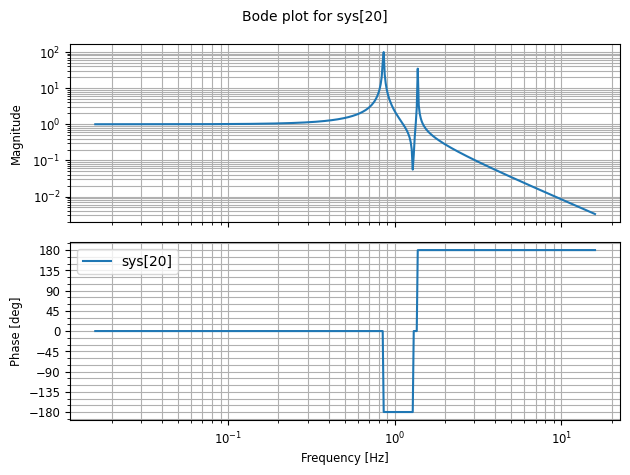

In [422]:
plot_tfs('l', 'l', damping=True) # L to L

Generating transfer function for l  to p
[0.00294595200000000, 0.0, 0.303470916000000, 1e-05, 6.29254080000000]


                               2                      
                     0.642096⋅s                       
──────────────────────────────────────────────────────
             4                2                       
0.002945952⋅s  + 0.303470916⋅s  + 1.0e-5⋅s + 6.2925408

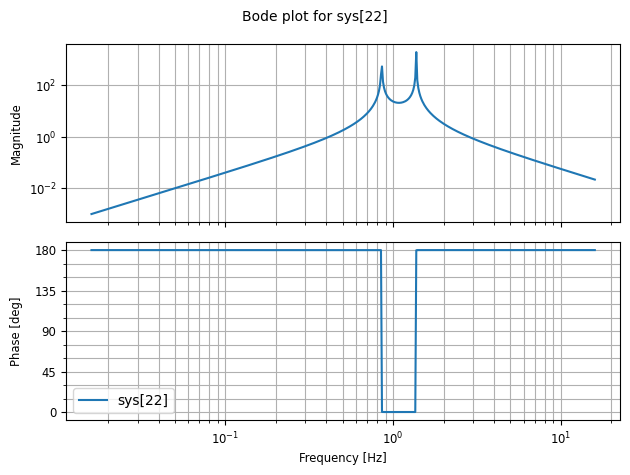

In [423]:
plot_tfs('l', 'p', damping=True) # L to P

Generating transfer function for p  to p
[0.00294595200000000, 0.0, 0.303470916000000, 1e-05, 6.29254080000000]


                           2                          
              0.207236484⋅s  + 6.2925408              
──────────────────────────────────────────────────────
             4                2                       
0.002945952⋅s  + 0.303470916⋅s  + 1.0e-5⋅s + 6.2925408

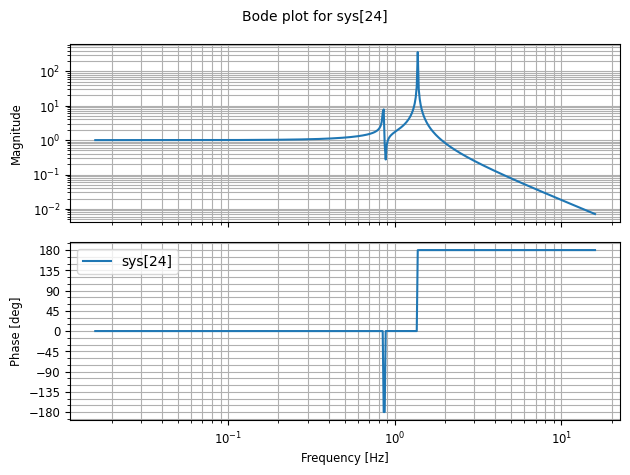

In [424]:
plot_tfs('p', 'p', damping=True) # P to P

Generating transfer function for p  to l
[0.00294595200000000, 0.0, 0.303470916000000, 1e-05, 6.29254080000000]


                                  2                   
                  0.002189333328⋅s                    
──────────────────────────────────────────────────────
             4                2                       
0.002945952⋅s  + 0.303470916⋅s  + 1.0e-5⋅s + 6.2925408

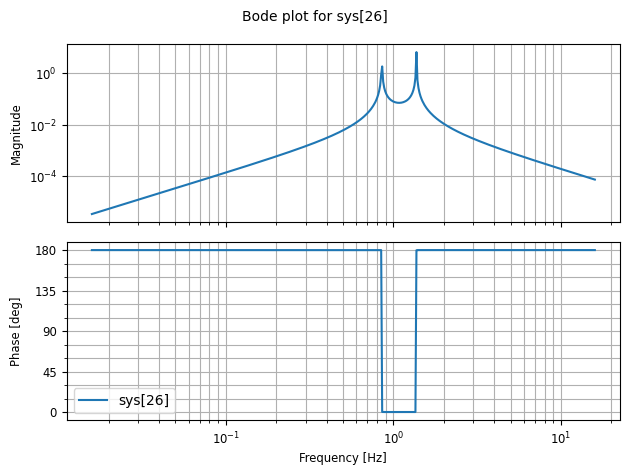

In [425]:
plot_tfs('p', 'l', damping=True) # P to L